In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete.zip') as target_file:

    target_file.extractall('/content/data_surface_complete/') # 압축풀기

In [ ]:
!nvidia-smi

Thu Apr 11 05:32:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.1/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

model = YOLO('yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 330MB/s]


In [ ]:
model.train(data='/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/data.yaml', epochs=100, patience=20, batch=12, imgsz=1024) # 8m

New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/data.yaml, epochs=100, patience=20, batch=12, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d8a386a860>
fitness: 1.3340362946582958
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([      1.487,      1.4207,      1.0106])
names: {0: 'braille_guide_blocks', 1: 'roadway', 2: 'crosswalk'}
plot: True
results_dict: {'metrics/precision(B)': 0.7747522641321769, 'metrics/recall(B)': 0.7622222080787258, 'metrics/mAP50(B)': 0.7842615560707401, 'metrics/mAP50-95(B)': 0.6590642920019741, 'metrics/precision(M)': 0.7879178419039664, 'metrics/recall(M)': 0.7783098767840939, 'metrics/mAP50(M)': 0.8011799379373924, 'metrics/mAP50-95(M)': 0.6470380916174506, 'fitness': 1.3340362946582958}
save_dir: PosixPath('runs/segment/train')
seg: 

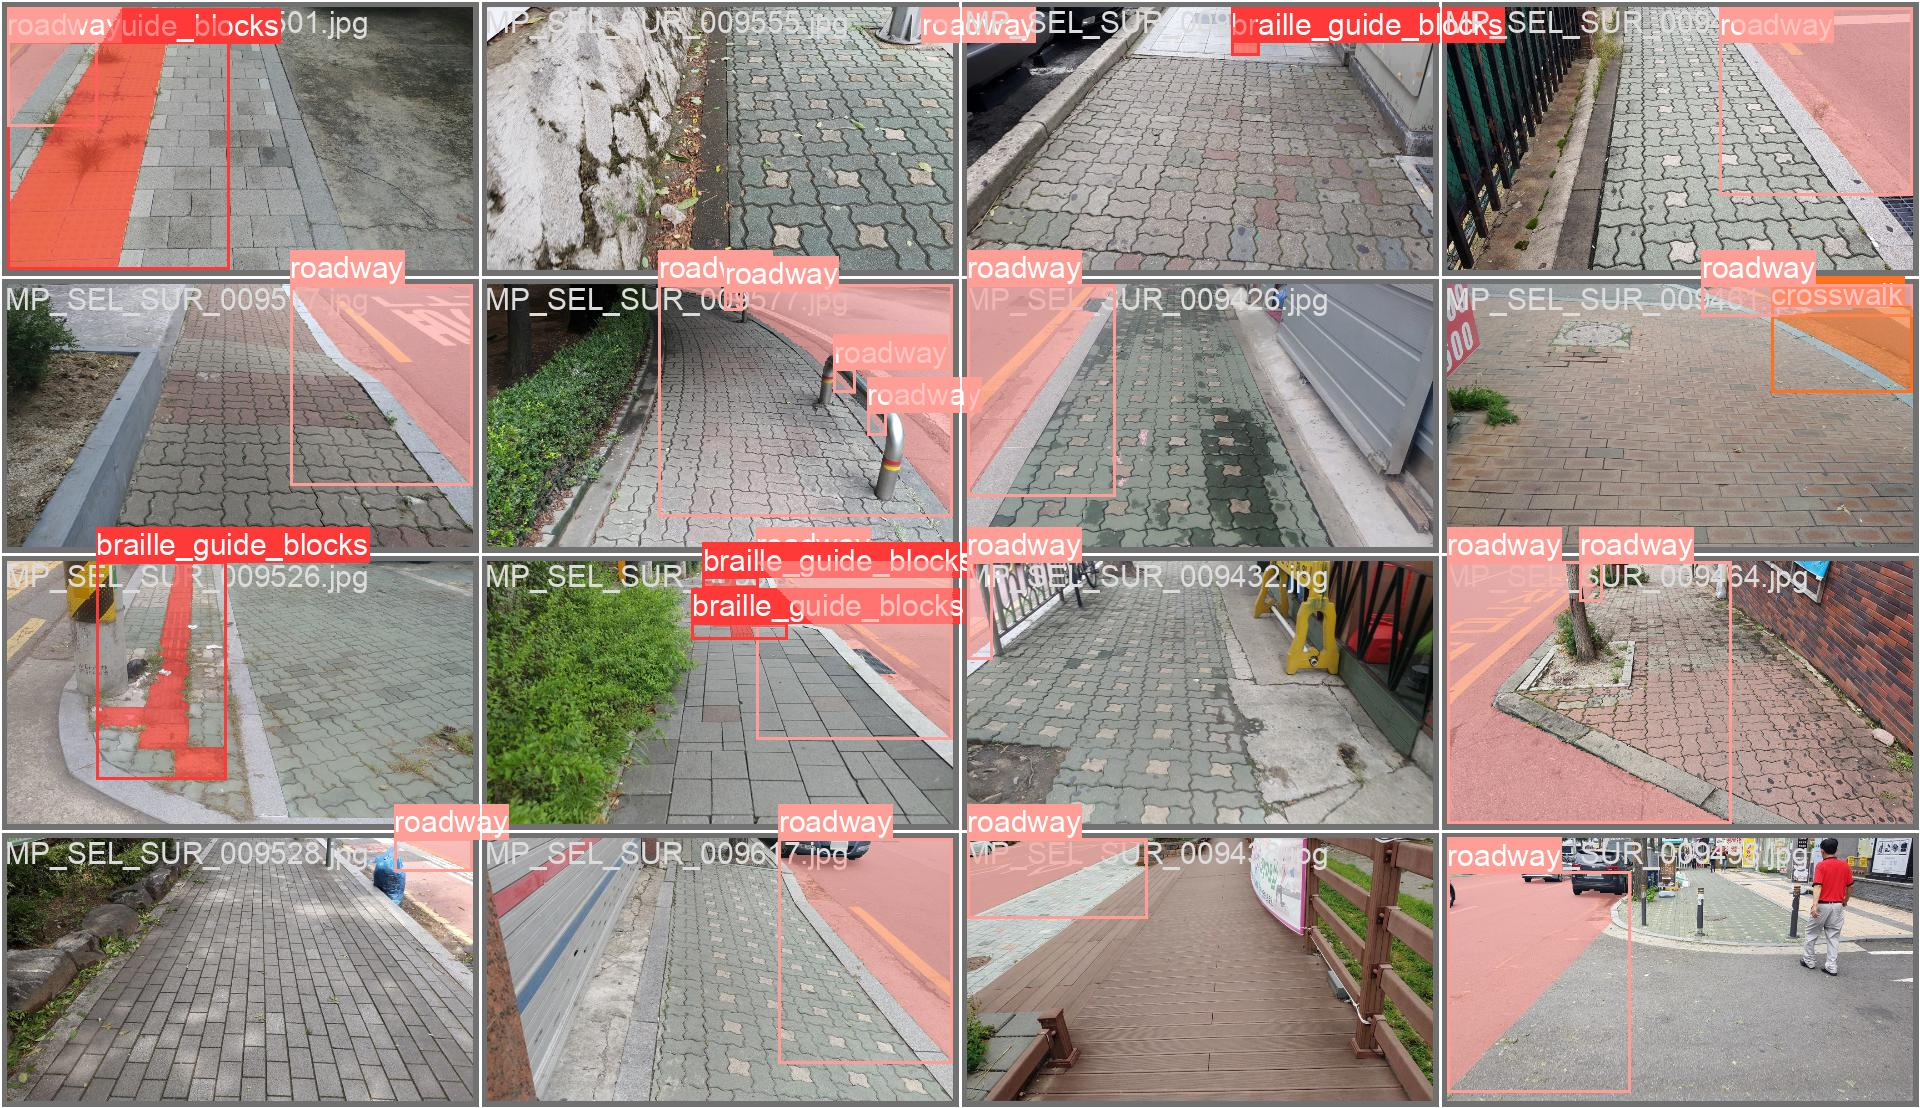

In [3]:
Image(filename='/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/yolov8m_seg epoch100/val_batch0_labels.jpg',width=1000) # label된 모습

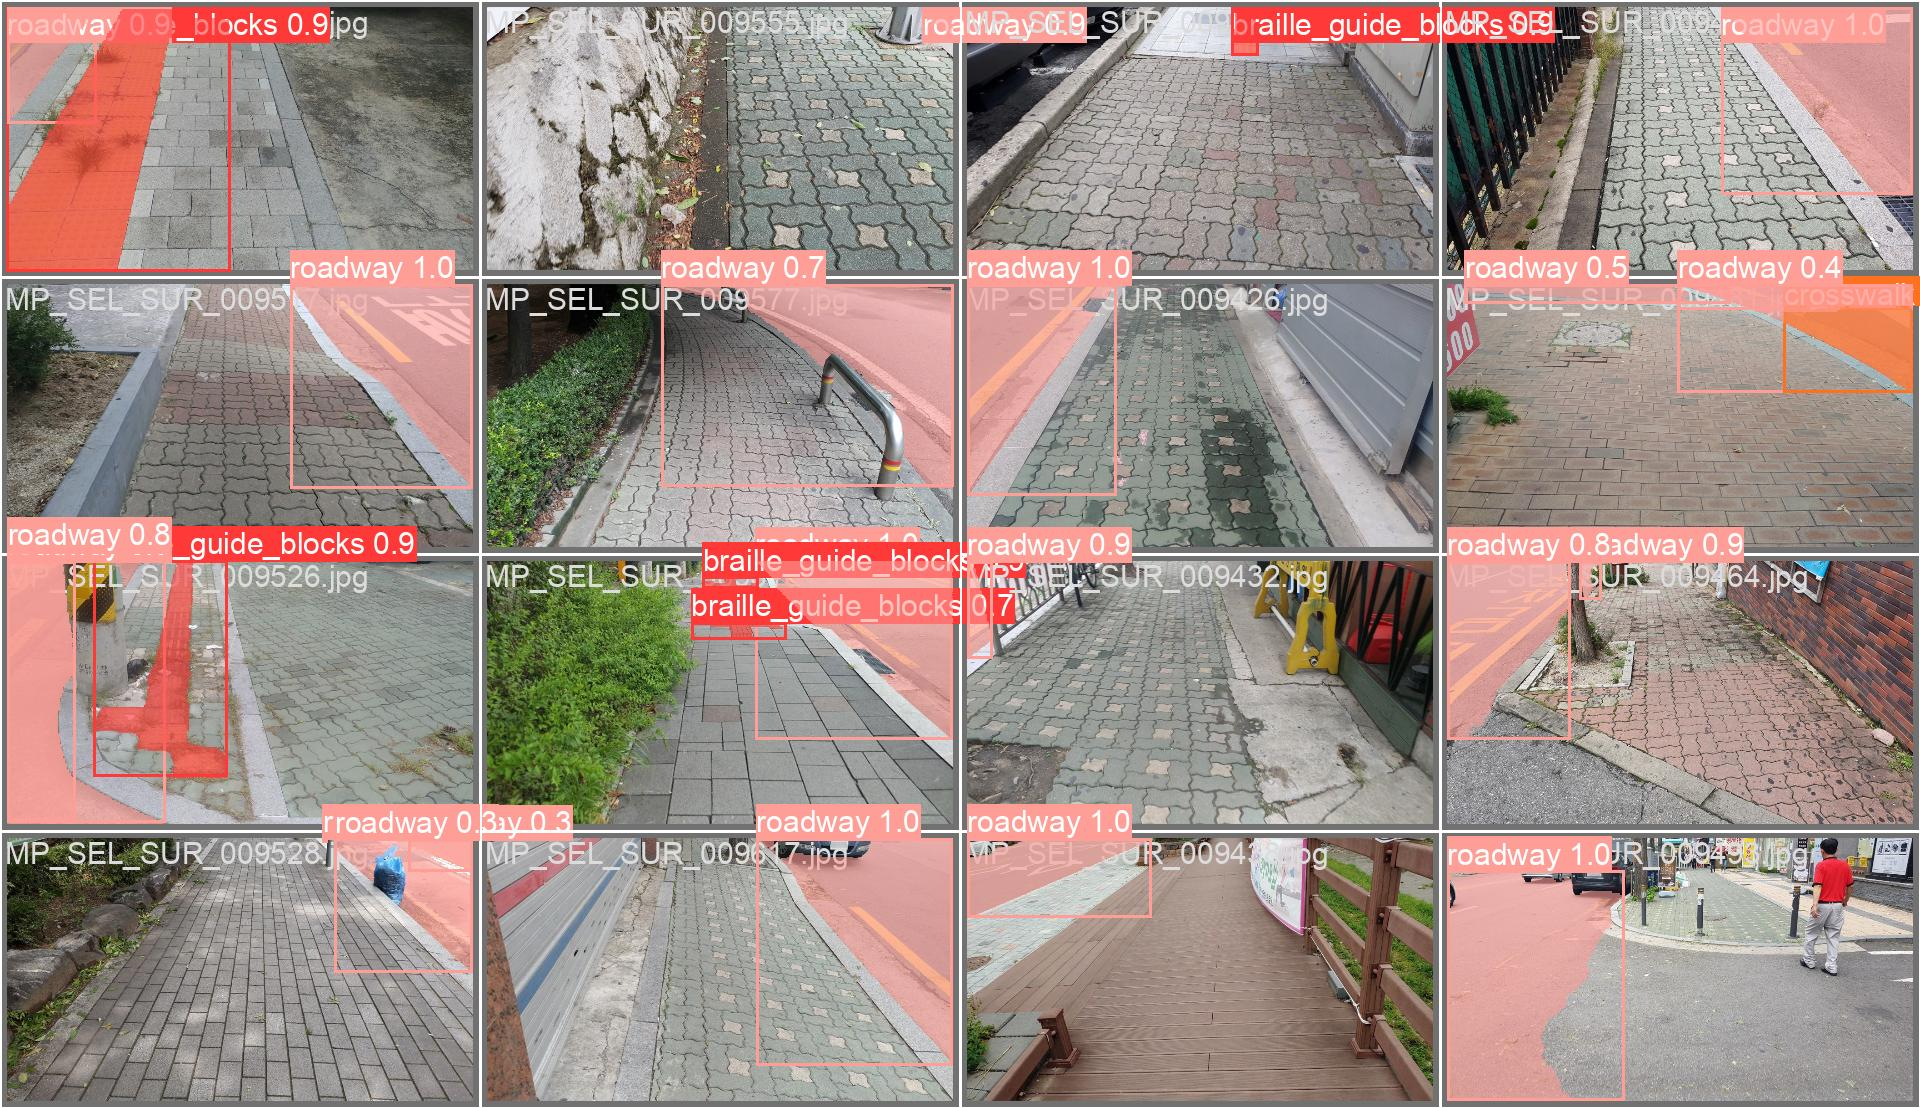

In [2]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/yolov8m_seg epoch100/val_batch0_pred.jpg',width=1000) # 모델 결과

In [ ]:
print(type(results),len(results))

<class 'list'> 457


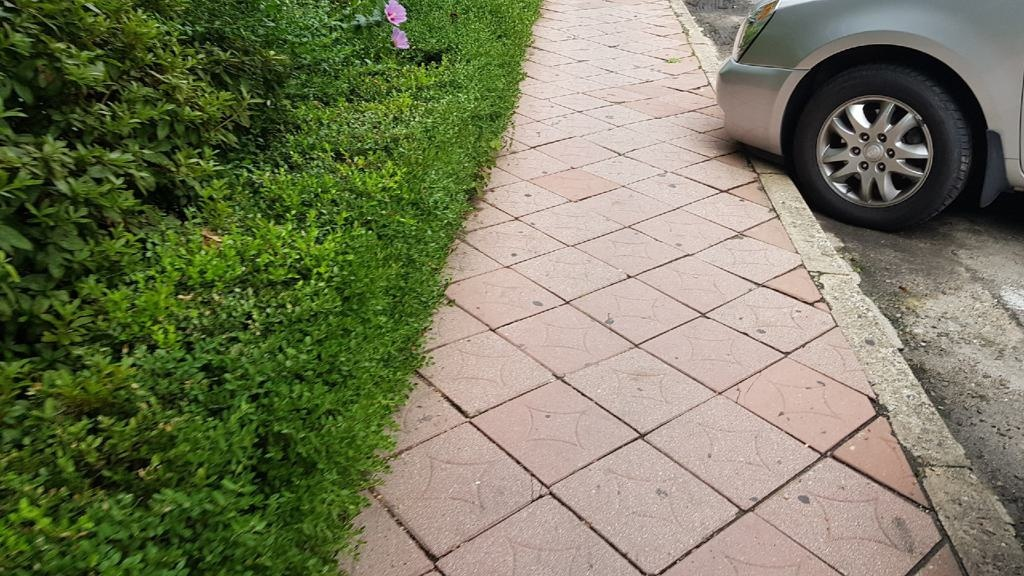

In [ ]:
import glob
import random
from IPython.display import Image, display

# test 데이터는 실제랑 비슷하게 한다고 검출되는 것이 거의 없는 이미지들로 골라놓았다고 한다.
image_name = random.choice(glob.glob('/content/runs/segment/predict/*.jpg')) # test 한 results 랜덤으로 뽑기
display(Image(filename=image_name,width=1000))

In [ ]:
import shutil

source_folder = '/content/runs/segment/train'
destination_folder = '/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/yolov8m_seg epoch100'

# 폴더 전체를 복사
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/yolov8m_seg epoch100'

In [ ]:
from google.colab import files

files.download('/content/runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

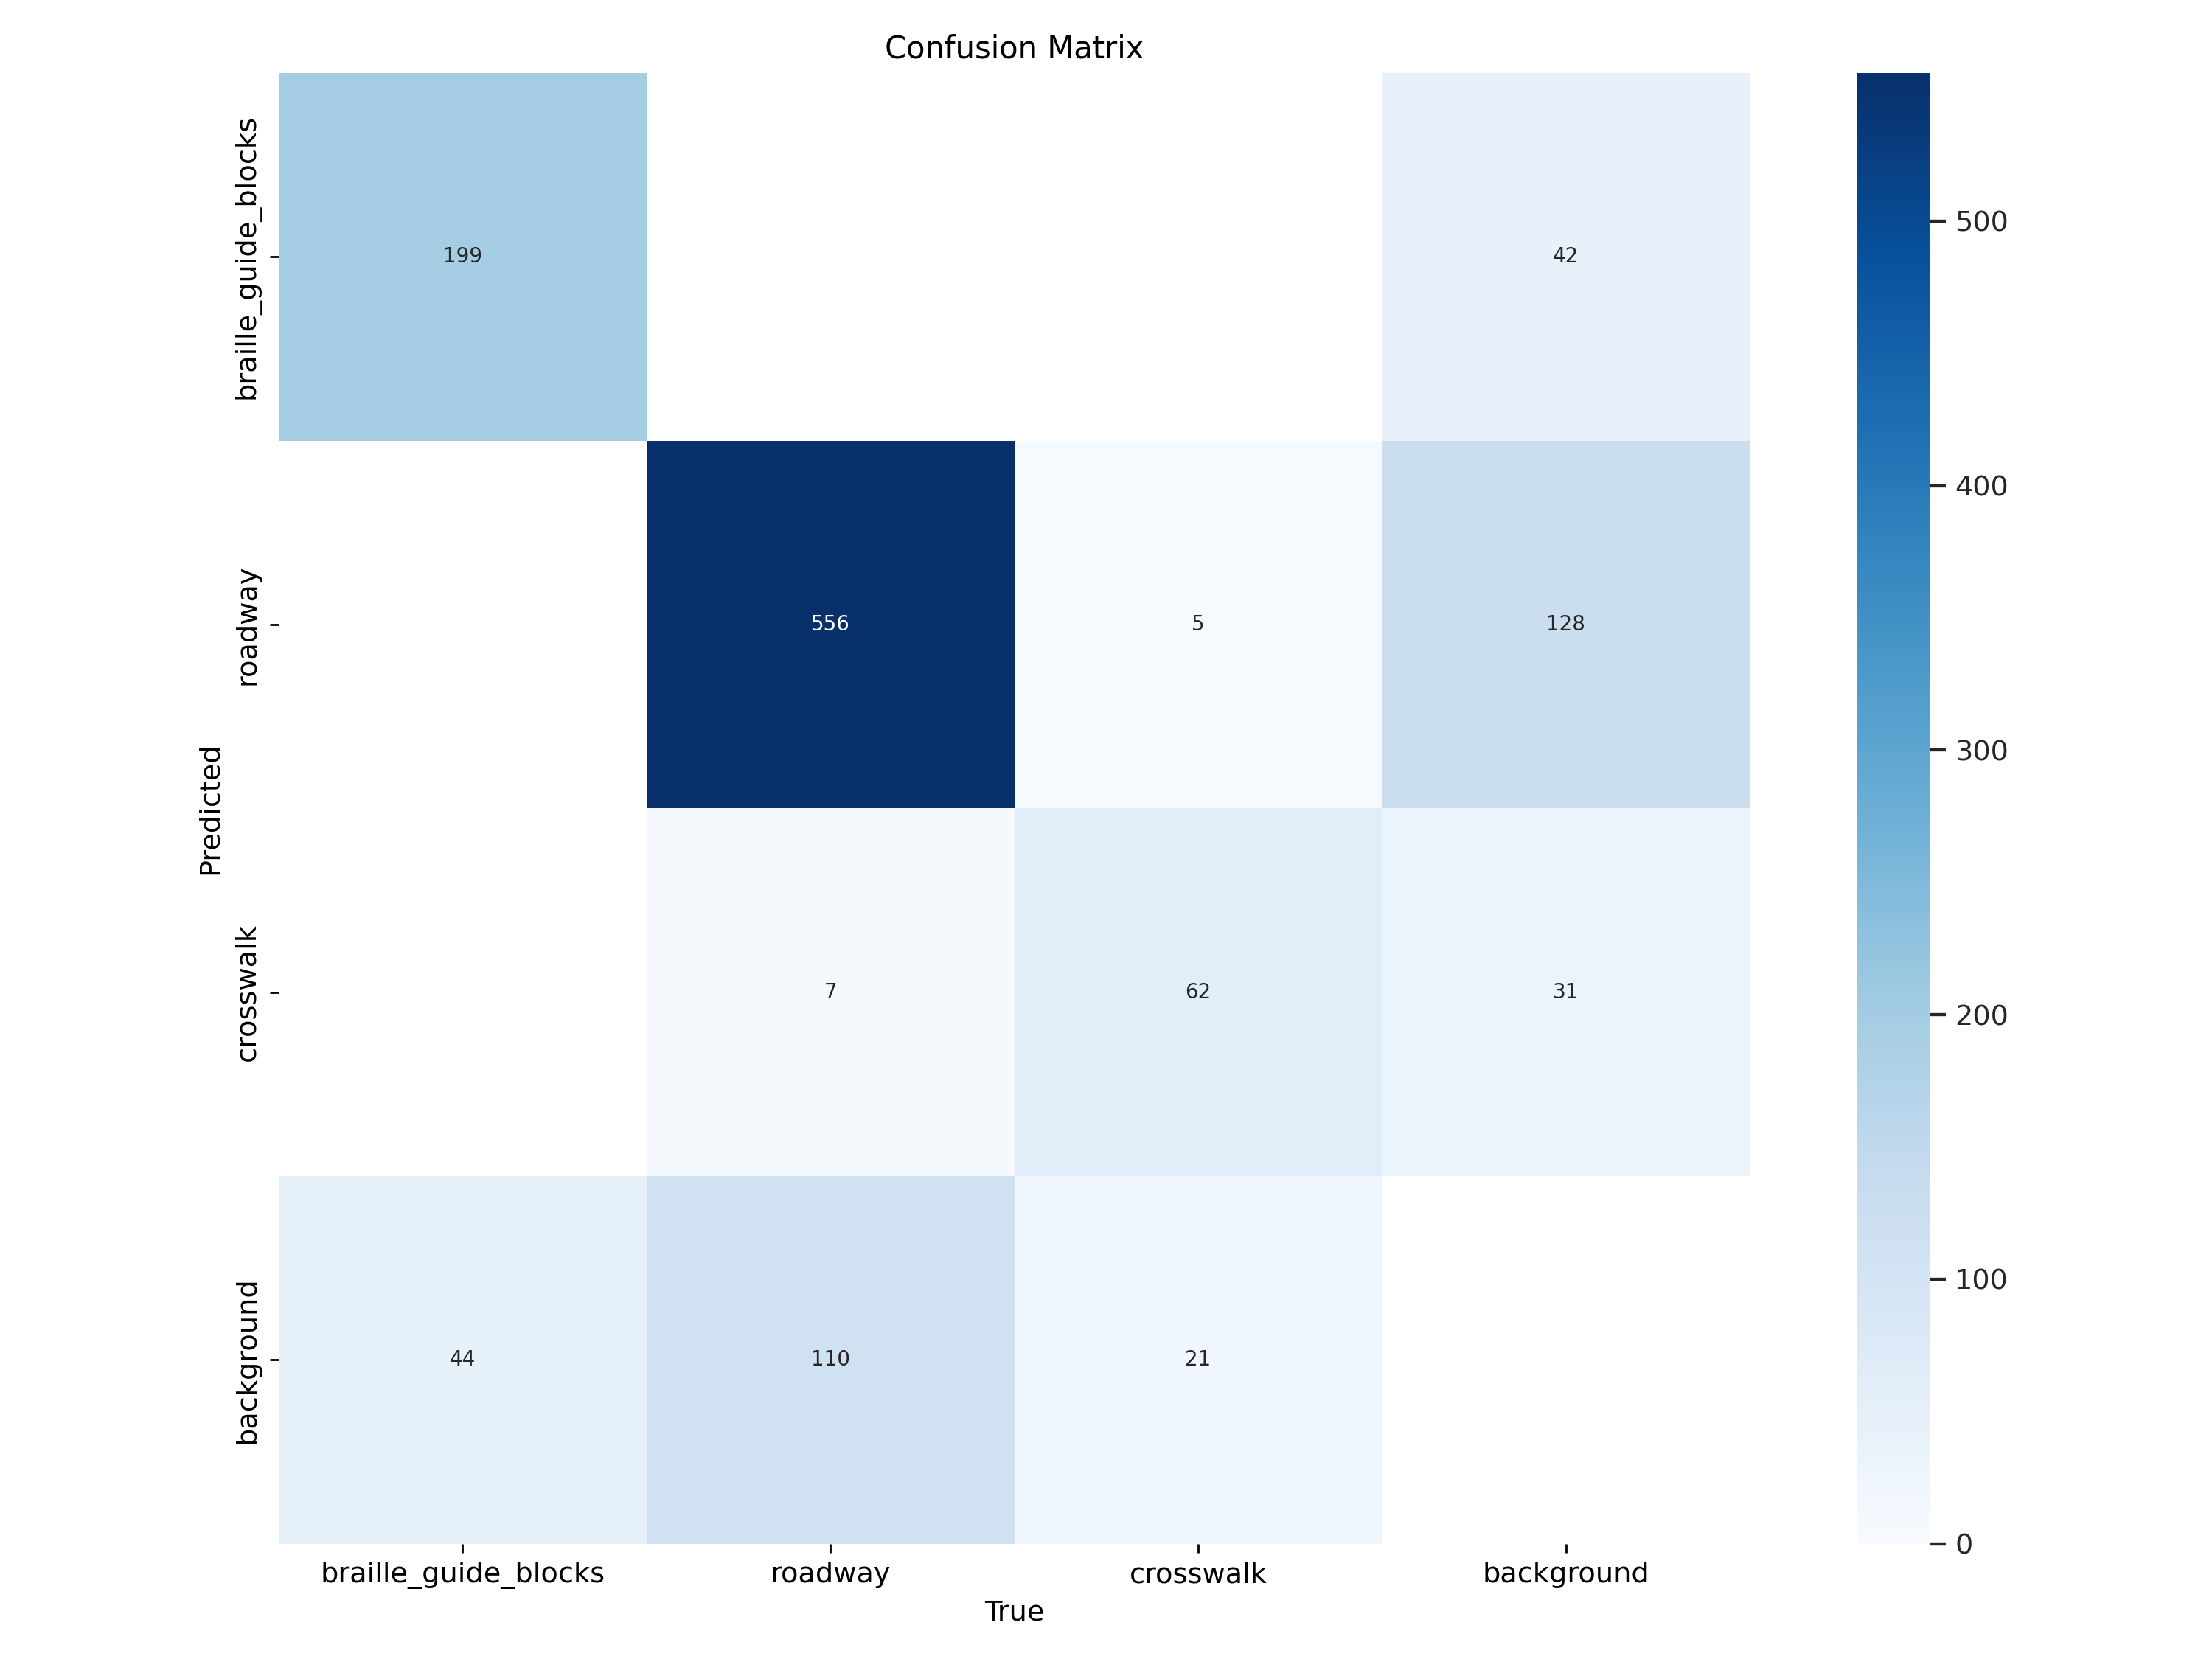

In [ ]:
Image(filename='/content/runs/segment/train/confusion_matrix.png',width=1000) #8m 100

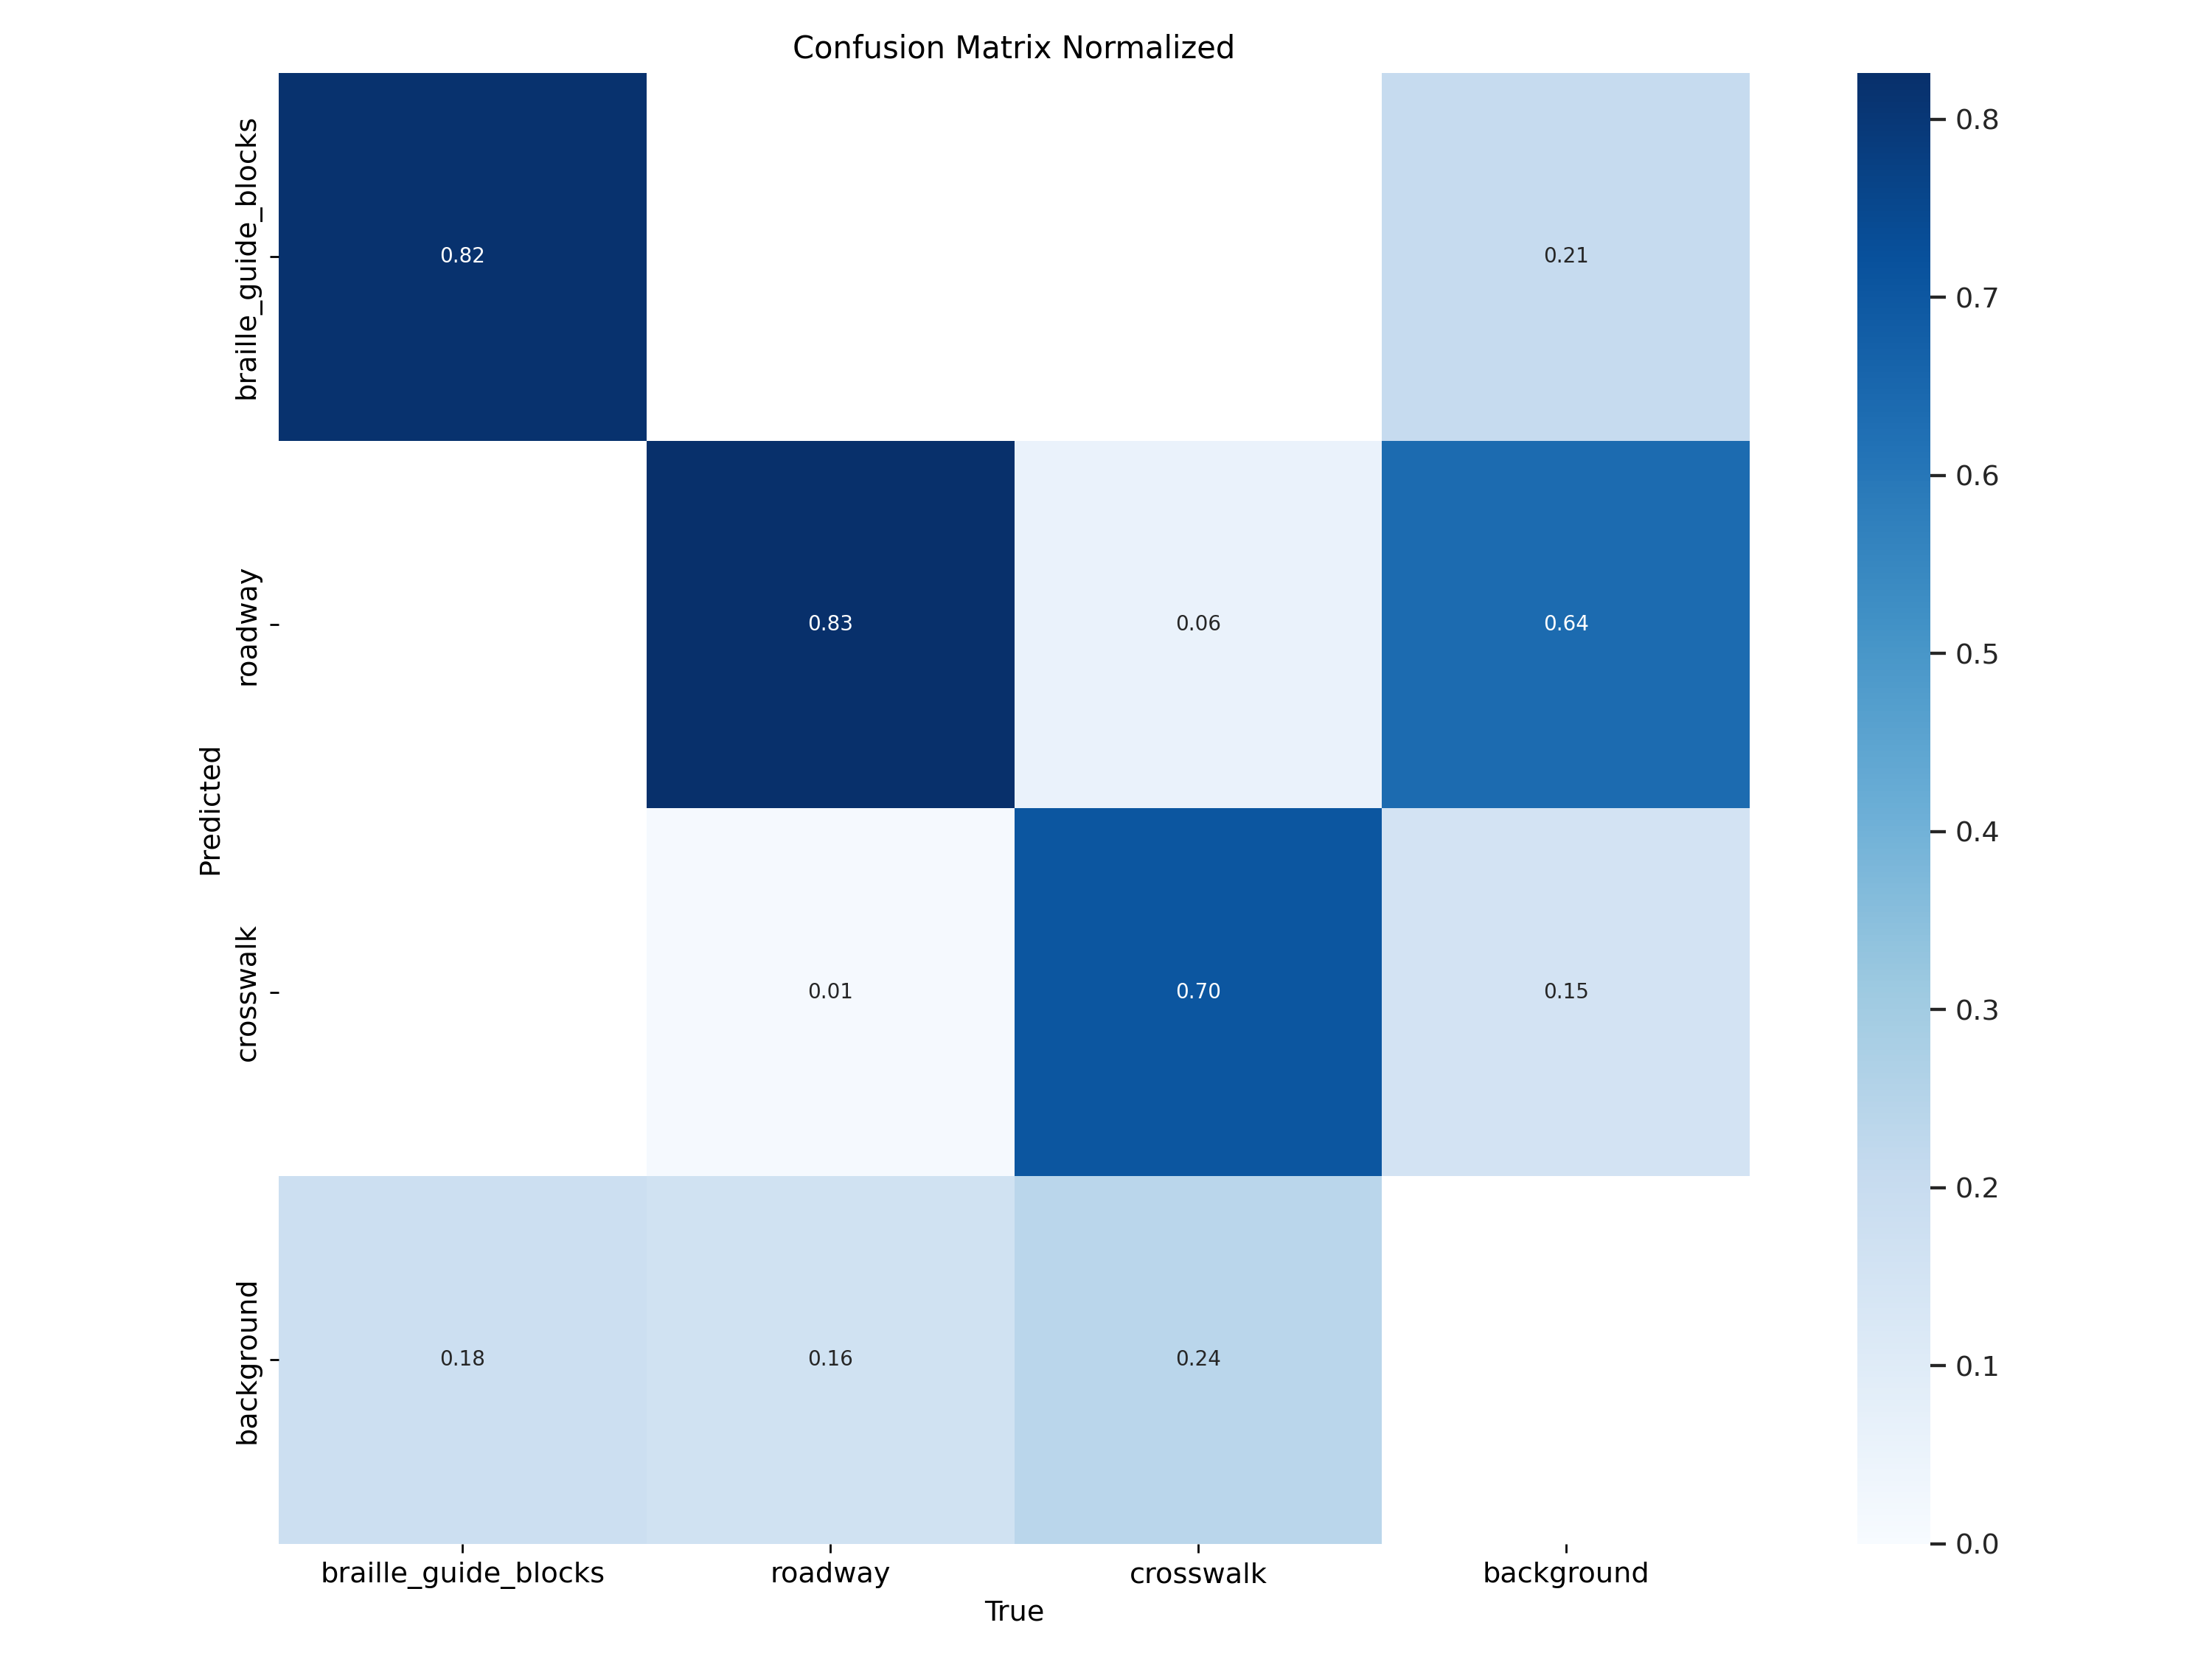

In [ ]:
Image(filename='/content/runs/segment/train/confusion_matrix_normalized.png',width=1000) #8m 100

In [ ]:
results = model.predict(source='/content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/', save=True)


image 1/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000087.jpg: 576x1024 2 roadways, 200.6ms
image 2/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000095.jpg: 576x1024 2 braille_guide_blockss, 2 roadways, 22.2ms
image 3/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000100.jpg: 576x1024 2 roadways, 22.5ms
image 4/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000115.jpg: 576x1024 1 roadway, 22.7ms
image 5/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000118.jpg: 576x1024 1 roadway, 28.0ms
image 6/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000119.jpg: 576x1024 2 braille_guide_blockss, 22.8ms
image 7/457 /content/drive/MyDrive/KITA_1026/project/ocr/data_surface_complete/test/images/MP_SEL_SUR_000161.j